In [1]:
import numpy as np
import torch
from sklearn import  metrics
from sklearn import datasets
from sklearn.semi_supervised.label_propagation import LabelSpreading

import random

OUTPUT_PATH = './output/'
labeled_nums = [100, 500, 1000]
num = 0

/home/harreyjia/anaconda3/envs/CapsuleGAN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
benign_set = np.load(OUTPUT_PATH + "benign.npy")
malignancy_set = np.load(OUTPUT_PATH + 'malignancy.npy')
fake_set = np.load(OUTPUT_PATH + 'fake_' + str(num) + '.npy')

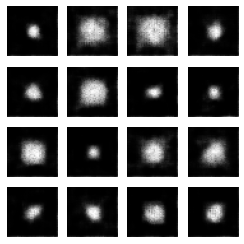

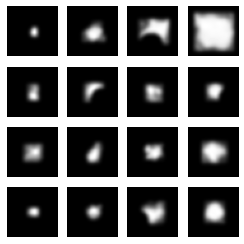

In [116]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

### plot benign nodules
# for i in range(benign_set.shape[0]):
#     plot_image = benign_set[i][0][4]
#     plot_image = plot_image * 127.5 + 127.5
#     plt.imshow(plot_image, cmap="gray")
#     plt.show()

### plot fake nodules
start = 16 * 300
fake_nodules = fake_set[start:start+16]
fake_nodules = fake_nodules * 127.5 + 127.5
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.1,right=0.5,top=0.5,bottom=0.1)

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(fake_nodules[i*4+j][0][4], cmap="gray")
        plt.axis("off")
plt.savefig(OUTPUT_PATH + "fake_sample.png")
plt.show()

### plot fake nodules
start = 16 * 28
malignancy_nodules = malignancy_set[start:start+16]
malignancy_nodules = malignancy_nodules * 127.5 + 127.5
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.1,right=0.5,top=0.5,bottom=0.1)

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(malignancy_nodules[i*4+j][0][4], cmap="gray")
        plt.axis("off")
plt.savefig(OUTPUT_PATH + "malignancy_sample.png")
plt.show()

In [7]:
for i in range(3):
    labeled_num = int(labeled_nums[i] / 2)
    labeled_malignancy = malignancy_set[:labeled_num]
    single_acc = []
#     iter_num = int(benign_set.shape[0] / labeled_num)
    for j in range(5):
        labeled_benign = np.array(random.sample(benign_set.tolist(), labeled_num))
        X = np.concatenate((labeled_benign, labeled_malignancy, fake_set), axis=0)

        X = torch.from_numpy(X)
        X = X.view(-1, 8 * 40 * 40)
#         X = torch.tensor(X, dtype=torch.float32)

        y = [1] * len(X)
        y[:labeled_num] = (0,) * labeled_num
        unlabeled_indices = np.arange(len(y))[labeled_num * 2:]
        X = X.detach().numpy()

        #半监督学习LabelSpreading模型
        y_train=np.copy(y) # 必须拷贝，后面要用到 y
        y_train[unlabeled_indices]=-1 # 未标记样本的标记设定为 -1
        clf=LabelSpreading(max_iter=200,kernel='rbf',gamma=0.65)
        clf.fit(X,y_train)
        ### 获取预测准确率
        predicted_labels = clf.transduction_[unlabeled_indices] # 预测标记
        print(sum(predicted_labels))
        true_labels = np.array(y)[unlabeled_indices] # 真实标记
        acc = metrics.accuracy_score(true_labels,predicted_labels)
        print("Accuracy:%f"%acc)
        single_acc.append(acc)
    print("ACC of %d: %f" % (labeled_num * 2, sum(single_acc) / len(single_acc)))

10216
Accuracy:0.510800
12078
Accuracy:0.603900
11263
Accuracy:0.563150
10197
Accuracy:0.509850
13060
Accuracy:0.653000
ACC of 100: 0.568140
11848
Accuracy:0.592400
9950
Accuracy:0.497500
12411
Accuracy:0.620550
13530
Accuracy:0.676500
12218
Accuracy:0.610900
ACC of 500: 0.599570
13236
Accuracy:0.661800
13210
Accuracy:0.660500
11865
Accuracy:0.593250
11235
Accuracy:0.561750
12296
Accuracy:0.614800
ACC of 1000: 0.618420
